In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

Using TensorFlow backend.


In [2]:
from __future__ import print_function
from keras.utils.np_utils import to_categorical 
from keras.layers import Dropout

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [6]:
training_set = train_datagen.flow_from_directory('C://Users//Ashpo Ghosh//Desktop//Major Project//Dataset//TRAIN',
                                                 target_size = (64,64),
                                                 batch_size = 16,
                                                 class_mode ='categorical',
                                                 #color_mode='grayscale',
                                                 shuffle=False,
                                                 seed=42
                                                 )



Found 2456 images belonging to 37 classes.


In [7]:

test_set = test_datagen.flow_from_directory('C://Users//Ashpo Ghosh//Desktop//Major Project//Dataset//TEST',
                                                 target_size = (64,64),
                                                 batch_size = 16,
                                                 class_mode ='categorical',
                                                 #color_mode='grayscale',
                                                 shuffle=False,
                                                 seed=42
                                                 )



Found 1002 images belonging to 37 classes.


In [11]:
input_shape = (64, 64, 3)
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Conv2D(64, (5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(37, activation='softmax'))



In [12]:

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
"""history = model.fit((item for item in training_set), train_labels, 
                    epochs=20, 
                    validation_data=((item for item in test_set), test_labels))

(eval_loss, eval_accuracy) = model.evaluate( 
    validation_data, test_labels, batch_size=16,verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)"""
hist=model.fit_generator(training_set,
                    steps_per_epoch = 200,
                    epochs = 40,
                    validation_data = test_set,
                    validation_steps = 141,
                    verbose=1)
                  

'history = model.fit((item for item in training_set), train_labels, \n                    epochs=20, \n                    validation_data=((item for item in test_set), test_labels))\n\n(eval_loss, eval_accuracy) = model.evaluate( \n    validation_data, test_labels, batch_size=16,verbose=1)\n\nprint("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) \nprint("[INFO] Loss: {}".format(eval_loss)) \nend= datetime.datetime.now()\nelapsed= end-start\nprint (\'Time: \', elapsed)'

Epoch 1/40
200/200 [==============================] - 486s 2s/step - loss: 3.5806 - accuracy: 0.1071 - val_loss: 2.1658 - val_accuracy: 0.1488
Epoch 2/40
200/200 [==============================] - 491s 2s/step - loss: 3.2939 - accuracy: 0.1253 - val_loss: 3.7431 - val_accuracy: 0.1083
Epoch 3/40
200/200 [==============================] - 512s 3s/step - loss: 3.2227 - accuracy: 0.1592 - val_loss: 3.5298 - val_accuracy: 0.1176
Epoch 4/40
200/200 [==============================] - 499s 2s/step - loss: 2.9656 - accuracy: 0.1526 - val_loss: 3.1966 - val_accuracy: 0.1346
Epoch 5/40
200/200 [==============================] - 481s 2s/step - loss: 2.8261 - accuracy: 0.2041 - val_loss: 0.3513 - val_accuracy: 0.2230
Epoch 6/40
200/200 [==============================] - 486s 2s/step - loss: 2.6796 - accuracy: 0.2231 - val_loss: 3.0109 - val_accuracy: 0.3249
Epoch 7/40
200/200 [==============================] - 480s 2s/step - loss: 2.2842 - accuracy: 0.3214 - val_loss: 3.0133 - val_accuracy: 0.2825

In [14]:
model.save('my_Odia40_model.h5')

In [15]:
test_set.reset()
pred=model.predict_generator(test_set,verbose=1)

63/63 [==============================] - 29s 467ms/step


In [16]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [18]:
print(hist.history.values())

dict_values([[2.165771484375, 3.74310302734375, 3.5298357009887695, 3.1965935230255127, 0.35132279992103577, 3.0109200477600098, 3.013291120529175, 2.212740182876587, 1.2239270210266113, 2.532954692840576, 1.8137130737304688, 0.7704827785491943, 0.1390763819217682, 0.9159858226776123, 1.5517241954803467, 1.535792589187622, 1.719731092453003, 0.3435472846031189, 1.5522634983062744, 0.8296408653259277, 0.06621278822422028, 1.7103351354599, 1.4331879615783691, 1.0478171110153198, 3.032525062561035, 0.13233762979507446, 0.7046977877616882, 1.4560253620147705, 1.0008749961853027, 2.4977192878723145, 0.7163585424423218, 0.9205883741378784, 0.8952301144599915, 0.18734361231327057, 0.02561253495514393, 1.5910499095916748, 0.750839114189148, 2.7293269634246826, 0.7586501240730286, 1.5926170349121094], [0.14884135127067566, 0.10828877240419388, 0.11764705926179886, 0.13458110392093658, 0.22296693921089172, 0.32486632466316223, 0.282531201839447, 0.3591800332069397, 0.471403032541275, 0.478609621

In [19]:
x=hist.history.get('val_accuracy')
s=0
for t in x:
    s = s + t
av=s/30
print(av*100)

76.54125263293584


Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

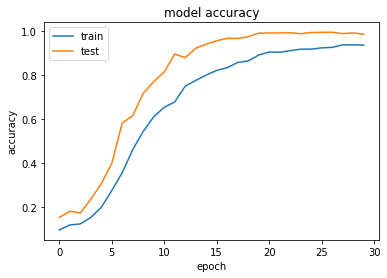

In [29]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

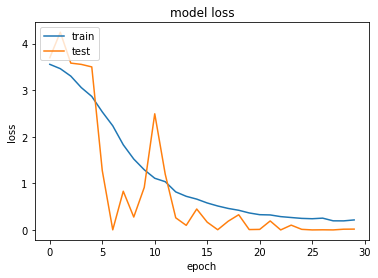

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
import numpy as np
predicted_class_indices=np.argmax(pred,axis=1)

In [31]:
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
labels.items()

dict_items([(0, 'କ୍ଷ'), (1, 'ଚ'), (2, 'ଛ'), (3, 'ଜ'), (4, 'ଝ'), (5, 'ଞ'), (6, 'ଟ'), (7, 'ଠ'), (8, 'ଡ'), (9, 'ଢ'), (10, 'ଣ'), (11, 'ତ'), (12, 'ଥ'), (13, 'ଦ'), (14, 'ଧ'), (15, 'ନ'), (16, 'ପ'), (17, 'ଫ'), (18, 'ବ'), (19, 'ଭ'), (20, 'ମ'), (21, 'ଯ'), (22, 'ର'), (23, 'ଲ'), (24, 'ଳ'), (25, 'ଶ'), (26, 'ଷ'), (27, 'ସ'), (28, 'ହ'), (29, 'ୟ'), (30, 'ୱ')])

In [21]:
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

NameError: name 'history' is not defined

In [24]:
predicted_class_indices

array([18, 24, 29, 20, 24, 16, 27, 19, 11, 19, 25, 30, 24,  2, 14, 27,  0,
       28, 20, 10, 29, 24, 20, 30,  2, 10, 19,  4, 23, 18, 18,  7,  9,  8,
       14,  4,  4, 13, 17, 10,  0,  5, 28, 27, 19,  3, 19, 17,  0,  7, 10,
       29,  1,  1, 29, 14, 21,  2, 18, 22,  5,  2, 26,  8, 16, 13, 11, 13,
       26,  9,  1, 23, 20,  6, 12,  2, 14, 22, 14, 25, 17, 30, 12, 13, 24,
       23,  3, 17,  7, 15,  6, 26,  0,  8, 15, 24, 12, 23, 22, 19,  6,  6,
        1,  5, 29,  0, 24,  5, 23, 28, 15, 28, 18, 13, 22, 23, 18, 24, 30,
       10, 12, 21, 27,  1, 20, 24,  4, 17, 26, 23,  8, 30, 11,  1,  5, 12,
        2, 21, 15, 27,  3, 26, 15, 30, 14, 29,  4,  5, 13, 12, 12,  8, 14,
        4, 11, 20, 17,  5, 23,  8, 27, 15, 15, 19, 23, 11,  4,  0, 15, 24,
       19, 17, 21, 29, 16, 27, 18, 24, 25,  1,  8, 20,  0, 10, 29, 29, 29,
       20, 30,  2, 21,  3, 10, 15, 25,  4, 28, 10,  2, 22, 22,  3, 11, 22,
       11,  7, 15, 16, 14,  2,  9, 19,  0,  1, 22,  3, 13, 17,  8, 12, 23,
       24,  3, 26,  4, 20

In [25]:
predictions


['ବ',
 'ଳ',
 'ୟ',
 'ମ',
 'ଳ',
 'ପ',
 'ସ',
 'ଭ',
 'ତ',
 'ଭ',
 'ଶ',
 'ୱ',
 'ଳ',
 'ଛ',
 'ଧ',
 'ସ',
 'କ୍ଷ',
 'ହ',
 'ମ',
 'ଣ',
 'ୟ',
 'ଳ',
 'ମ',
 'ୱ',
 'ଛ',
 'ଣ',
 'ଭ',
 'ଝ',
 'ଲ',
 'ବ',
 'ବ',
 'ଠ',
 'ଢ',
 'ଡ',
 'ଧ',
 'ଝ',
 'ଝ',
 'ଦ',
 'ଫ',
 'ଣ',
 'କ୍ଷ',
 'ଞ',
 'ହ',
 'ସ',
 'ଭ',
 'ଜ',
 'ଭ',
 'ଫ',
 'କ୍ଷ',
 'ଠ',
 'ଣ',
 'ୟ',
 'ଚ',
 'ଚ',
 'ୟ',
 'ଧ',
 'ଯ',
 'ଛ',
 'ବ',
 'ର',
 'ଞ',
 'ଛ',
 'ଷ',
 'ଡ',
 'ପ',
 'ଦ',
 'ତ',
 'ଦ',
 'ଷ',
 'ଢ',
 'ଚ',
 'ଲ',
 'ମ',
 'ଟ',
 'ଥ',
 'ଛ',
 'ଧ',
 'ର',
 'ଧ',
 'ଶ',
 'ଫ',
 'ୱ',
 'ଥ',
 'ଦ',
 'ଳ',
 'ଲ',
 'ଜ',
 'ଫ',
 'ଠ',
 'ନ',
 'ଟ',
 'ଷ',
 'କ୍ଷ',
 'ଡ',
 'ନ',
 'ଳ',
 'ଥ',
 'ଲ',
 'ର',
 'ଭ',
 'ଟ',
 'ଟ',
 'ଚ',
 'ଞ',
 'ୟ',
 'କ୍ଷ',
 'ଳ',
 'ଞ',
 'ଲ',
 'ହ',
 'ନ',
 'ହ',
 'ବ',
 'ଦ',
 'ର',
 'ଲ',
 'ବ',
 'ଳ',
 'ୱ',
 'ଣ',
 'ଥ',
 'ଯ',
 'ସ',
 'ଚ',
 'ମ',
 'ଳ',
 'ଝ',
 'ଫ',
 'ଷ',
 'ଲ',
 'ଡ',
 'ୱ',
 'ତ',
 'ଚ',
 'ଞ',
 'ଥ',
 'ଛ',
 'ଯ',
 'ନ',
 'ସ',
 'ଜ',
 'ଷ',
 'ନ',
 'ୱ',
 'ଧ',
 'ୟ',
 'ଝ',
 'ଞ',
 'ଦ',
 'ଥ',
 'ଥ',
 'ଡ',
 'ଧ',
 'ଝ',
 'ତ',
 'ମ',
 'ଫ',
 'ଞ',
 'ଲ',
 'ଡ',
 'ସ',
 'ନ',
 'ନ',
 'ଭ',
 'ଲ',


In [29]:
import pandas as pd
filenames=test_set.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions,
                     "Predicted_indices":predicted_class_indices})
results.to_csv("results.csv",index=False)

In [35]:
score = model.evaluate(test_set.labels,predicted_class_indices, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: Error when checking input: expected conv2d_4_input to have 4 dimensions, but got array with shape (681, 1)

In [33]:
dir(test_set)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format',
 'save_prefix',
 'save_to_dir',
 'see

In [34]:
test_set.labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
       10, 10, 10, 10, 10